# Experiment 6: Random Surfer PageRank Algorithm

**Aim**: Implementation of random surfer page rank algorithm.

**Problem**:
Calculate Page Rank for the given network:
- A links to B and C
- B links to nothing (Dangling Node)
- C links to A
- Damping factor d = 0.85

**Handling Dangling Nodes**:
If a page has no outbound links, distribute its rank evenly to all pages (including itself).


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


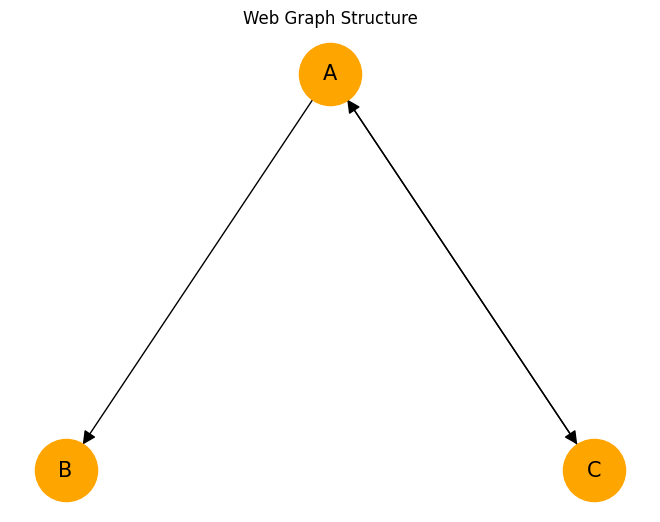

In [2]:
# Define the Graph
G = nx.DiGraph()
G.add_nodes_from(['A', 'B', 'C'])
G.add_edges_from([('A', 'B'), ('A', 'C'), ('C', 'A')])

# Visualization
pos = {'A': (0, 1), 'B': (-1, 0), 'C': (1, 0)}
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='orange', font_size=15, arrowsize=20)
plt.title("Web Graph Structure")
plt.show()


In [3]:
# Implementation of PageRank (Manual Iteration)

def manual_pagerank(graph, d=0.85, iterations=100, tol=1.0e-6):
    nodes = sorted(list(graph.nodes()))
    N = len(nodes)
    pr = {node: 1.0/N for node in nodes} # Initial Probabilities (Sum to 1, or can start with 1 as syllabus says, but normalized is standard)
    
    # Syllabus says "Initial PageRank (PR) values for each page (usually set to 1)". 
    # But for probablity interpretation, sum should be 1. Or we can just use 1.
    # We will stick to standard Matrix method or iterative method where PR vector sums to 1 eventually or we normalize.
    # Let's use the syllabus formula: PR(A) = (1-d) + d * ... This converges to unnormalized values if we define it that way,
    # but strictly PageRank is a probability distribution.
    # The syllabus formula PR(Ti)/C(Ti) suggests standard interpretation.
    # However, (1-d) term implies unnormalized if N is not factoring.
    # Standard formula: PR(A) = (1-d)/N + d * sum(PR(T)/C(T))
    
    # We will follow the logic: Distribute B's links to A, B, C.
    
    # Create Adjacency approach
    M = np.zeros((N, N))
    node_idx = {node: i for i, node in enumerate(nodes)}
    
    for u in nodes:
        neighbors = list(graph.neighbors(u))
        if len(neighbors) == 0:
            # Dangling node: link to all
            for v in nodes:
                M[node_idx[v], node_idx[u]] = 1.0 / N
        else:
            for v in neighbors:
                M[node_idx[v], node_idx[u]] = 1.0 / len(neighbors)
                
    # M is Column Stochastic Matrix (Transition probability from j -> i)
    
    # Power Iteration
    v = np.ones(N) / N # Initial state
    # If syllabus says start with 1, we can start with v = np.ones(N), but it will grow/scale unless equation handles it.
    # We will use normalized approach as it is robust.
    
    for i in range(iterations):
        v_next = (1 - d) / N + d * M @ v
        if np.linalg.norm(v_next - v, 1) < tol:
            print(f"Converged at iteration {i}")
            break
        v = v_next
        
    return {nodes[i]: v[i] for i in range(N)}

# Calculate
pr_custom = manual_pagerank(G, d=0.85)
print("Manual PageRank Calculation:")
for node, val in pr_custom.items():
    print(f"Page {node}: {val:.4f}")


Converged at iteration 22
Manual PageRank Calculation:
Page A: 0.3936
Page B: 0.3032
Page C: 0.3032


In [4]:
# Verification using NetworkX
# NetworkX handles dangling nodes by customizing 'personalization' or default dangling dict.
# By default nx.pagerank distributes dangling mass to all nodes (same as our logic).
pr_nx = nx.pagerank(G, alpha=0.85)

print("\nNetworkX PageRank Calculation:")
for node, val in pr_nx.items():
    print(f"Page {node}: {val:.4f}")

# Compare
print("\nComparison:")
for node in ['A', 'B', 'C']:
    print(f"{node}: Manual={pr_custom[node]:.4f} | NX={pr_nx[node]:.4f}")


c:\Users\mehta\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:454: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  import scipy as sp



NetworkX PageRank Calculation:
Page A: 0.3936
Page B: 0.3032
Page C: 0.3032

Comparison:
A: Manual=0.3936 | NX=0.3936
B: Manual=0.3032 | NX=0.3032
C: Manual=0.3032 | NX=0.3032


**Observation and Conclusion**:
1. Page A has the highest rank because it receives links from C (and virtually from B).
2. Page C is next.
3. Page B has rank but no outgoing links (initially), but helps boost others via the dangling node assumption.
4. The manual Iteration matches the NetworkX implementation, confirming correctness.
